In [57]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import homogeneity_score, completeness_score

### problem1

In [6]:
#Load the dataset
url='https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
columns_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight','acceleration', 'model year', 'origin', 'car name']
#df_auto = pd.read_csv(url, delim_whitespace=True, names=columns_names, na_values='?')
df = pd.read_csv(url, sep=r'\s+', names=columns_names, na_values='?')

In [7]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [8]:
# Handle missing values
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

In [9]:
continuous_features = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
X = df[continuous_features]

In [10]:
model = AgglomerativeClustering(
    n_clusters=3, 
    linkage='average', 
    metric='euclidean' 
)
clusters = model.fit_predict(X)

In [11]:
cluster_stats = X.groupby(clusters).agg(['mean', 'var'])
print("Statistics for each cluster:")
print(cluster_stats)

Statistics for each cluster:
         mpg            displacement               horsepower              \
        mean        var         mean          var        mean         var   
0  27.365414  41.976309   131.934211  2828.083391   84.300061  369.143491   
1  13.889062   3.359085   358.093750  2138.213294  167.046875  756.521577   
2  17.510294   8.829892   278.985294  2882.492318  124.470588  713.088674   

        weight                acceleration             
          mean            var         mean        var  
0  2459.511278  182632.099872    16.298120   5.718298  
1  4398.593750   74312.340278    13.025000   3.591429  
2  3624.838235   37775.809263    15.105882  10.556980  


In [12]:
origin_stats = X.groupby(df['origin']).agg(['mean', 'var'])
print("\nStatistics grouped by origin:")
print(origin_stats)


Statistics grouped by origin:
              mpg            displacement               horsepower  \
             mean        var         mean          var        mean   
origin                                                               
1       20.083534  40.997026   245.901606  9702.612255  118.814769   
2       27.891429  45.211230   109.142857   509.950311   81.241983   
3       30.450633  37.088685   102.708861   535.465433   79.835443   

                          weight                acceleration            
                var         mean            var         mean       var  
origin                                                                  
1       1569.532304  3361.931727  631695.128385    15.033735  7.568615  
2        410.659789  2423.300000  240142.328986    16.787143  9.276209  
3        317.523856  2221.227848  102718.485881    16.172152  3.821779  


In [13]:
cross_table = pd.crosstab(clusters, df['origin'], margins=True, margins_name="Total")
cross_table_percent = pd.crosstab(clusters, df['origin'], normalize='index').round(2)
print("\nCross-distribution table between clusters and origins (quantity)：")
print(cross_table)
print("\nCluster-to-origin distribution ratio (row normalized)：")
print(cross_table_percent)


Cross-distribution table between clusters and origins (quantity)：
origin    1   2   3  Total
row_0                     
0       120  67  79    266
1        64   0   0     64
2        65   3   0     68
Total   249  70  79    398

Cluster-to-origin distribution ratio (row normalized)：
origin     1     2    3
row_0                  
0       0.45  0.25  0.3
1       1.00  0.00  0.0
2       0.96  0.04  0.0


In [14]:
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False    

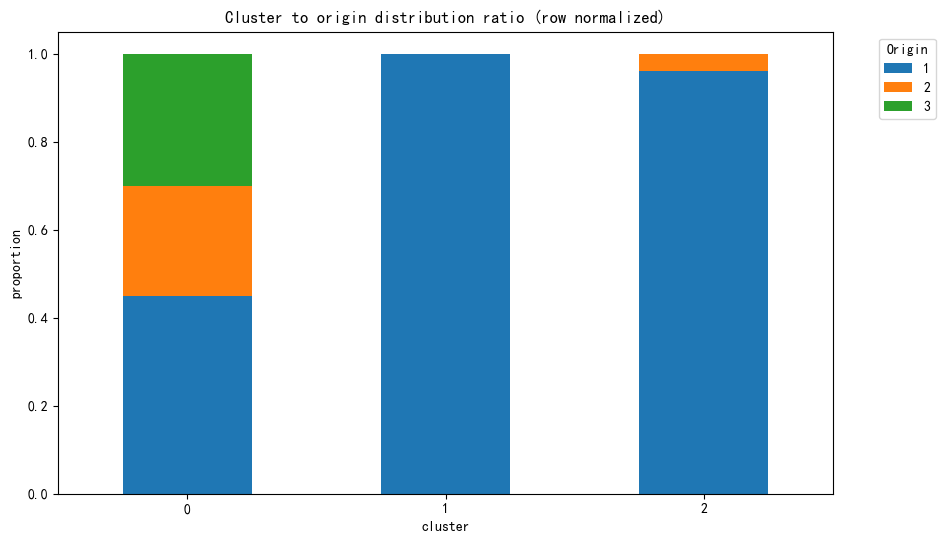

In [15]:
cross_table_percent.plot.bar(stacked=True, figsize=(10, 6))
plt.title('Cluster to origin distribution ratio (row normalized)')
plt.ylabel('proportion')
plt.xlabel('cluster')
plt.xticks(rotation=0)
plt.legend(title='Origin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

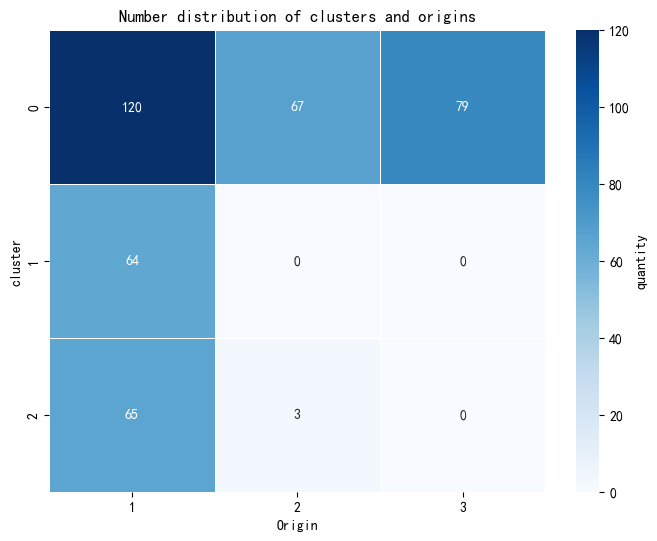

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(cross_table.iloc[:-1, :-1], annot=True, fmt='d', cmap='Blues', 
            cbar_kws={'label': 'quantity'}, linewidths=.5)
plt.title('Number distribution of clusters and origins')
plt.xlabel('Origin')
plt.ylabel('cluster')
plt.show()

### Problem2

In [17]:
boston = fetch_openml(name='boston', version=1, as_frame=True)
df = pd.DataFrame(boston.data, columns=boston.feature_names)  
df['TARGET'] = boston.target


In [42]:
print("缺失值数量：", df.isnull().sum().sum())

缺失值数量： 0


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET,cluster
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0


In [19]:
print("Feature data type checking:")
print(df[boston.feature_names].dtypes)

features = boston.feature_names
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Feature data type checking:
CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD        category
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
dtype: object


In [32]:
best_k = 2
best_score = -1
results = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    if score > best_score:
        best_k, best_score = k, score
    results.append((k, score))
    print(f"k={k}: Silhouette Score = {score:.4f}")
    

k=2: Silhouette Score = 0.3601
k=3: Silhouette Score = 0.2448
k=4: Silhouette Score = 0.2275
k=5: Silhouette Score = 0.2389
k=6: Silhouette Score = 0.2291


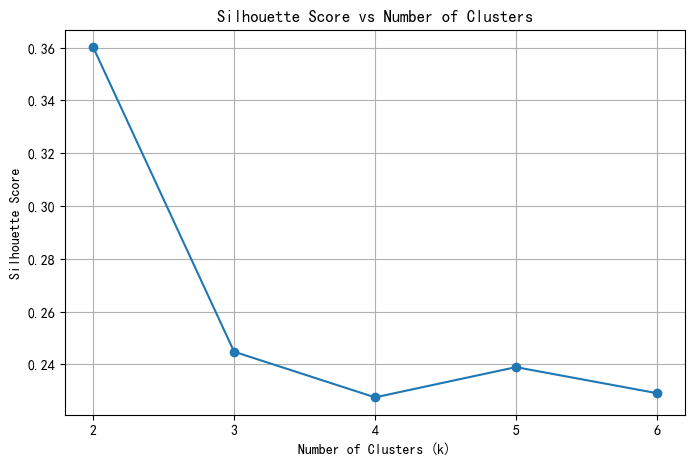

Best k: 2 with Silhouette Score: 0.3601


In [33]:
k_values, scores = zip(*results)
plt.figure(figsize=(8, 5))
plt.plot(k_values, scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.xticks(k_values)
plt.show()
print(f"Best k: {best_k} with Silhouette Score: {best_score:.4f}")

In [34]:
kmeans = KMeans(n_clusters=best_k, random_state=42).fit(X_scaled)
df['cluster'] = kmeans.labels_

In [35]:
df[features] = df[features].astype(float)
cluster_means = df.groupby('cluster')[features].mean()

In [36]:
centroids_scaled = kmeans.cluster_centers_
centroids_raw = scaler.inverse_transform(centroids_scaled)
centroids_df = pd.DataFrame(centroids_raw, columns=features)

In [40]:
print(f"\nbest k={best_k}")
print("\nCluster mean vs centroid coordinates (should be exactly the same):")
for i in range(best_k):
    print(f"\ncluster {i}:")
    display(pd.concat([
        cluster_means.loc[i].rename('Raw mean'),
        centroids_df.iloc[i].rename('Centroid coordinates')
    ], axis=1))


best k=2

Cluster mean vs centroid coordinates (should be exactly the same):

cluster 0:


,Raw mean,Centroid coordinates
CRIM,0.261172,0.261172
ZN,17.477204,17.477204
INDUS,6.885046,6.885046
CHAS,0.069909,0.069909
NOX,0.487011,0.487011
RM,6.455422,6.455422
AGE,56.339210,56.339210
DIS,4.756868,4.756868
RAD,4.471125,4.471125
TAX,301.917933,301.917933



cluster 1:


,Raw mean,Centroid coordinates
CRIM,9.844730,9.844730e+00
ZN,0.000000,1.243450e-14
INDUS,19.039718,1.903972e+01
CHAS,0.067797,6.779661e-02
NOX,0.680503,6.805028e-01
RM,5.967181,5.967181e+00
AGE,91.318079,9.131808e+01
DIS,2.007242,2.007242e+00
RAD,18.988701,1.898870e+01
TAX,605.858757,6.058588e+02


### Problem3

In [58]:
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

In [59]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [65]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('target', axis=1))

In [66]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

In [67]:
df['cluster'] = labels
h_score = homogeneity_score(wine.target, labels)
c_score = completeness_score(wine.target, labels)

In [68]:
print(f"Homogeneity Score: {h_score:.4f}")
print(f"Completeness Score: {c_score:.4f}")

Homogeneity Score: 0.8788
Completeness Score: 0.8730


In [56]:
# 6. 指标解释
#print("指标解释：")
#print("- 同质性 (Homogeneity): 每个簇中只包含单一真实类别的程度。值越高，簇纯度越高。")
#print("- 完整性 (Completeness): 同一真实类别的样本被分配到同一簇的程度。值越高，类内聚合度越好。")